# 2024 NVD Analysis Time

In [1]:
import pandas as pd

In [2]:
AT_2024 = pd.read_csv('data/2024.csv')


,CVE,Published,AnalysisTime,Difference
0,CVE-2015-10128,2024-01-02 14:15:00,2024-01-09 14:11:20.097,6 days 23:56:20.097000
1,CVE-2016-20021,2024-01-12 03:15:00,2024-01-22 16:27:08.227,10 days 13:12:08.227000
2,CVE-2017-20188,2024-01-02 15:15:00,2024-01-09 14:28:14.880,6 days 23:13:14.880000
3,CVE-2018-25095,2024-01-08 19:15:00,2024-01-11 18:42:09.650,2 days 23:27:09.650000
4,CVE-2018-25097,2024-01-02 16:15:00,2024-01-09 15:30:05.460,6 days 23:15:05.460000
...,...,...,...,...
1113,CVE-2024-23173,2024-01-12 05:15:00,2024-01-18 20:23:22.827,6 days 15:08:22.827000
1114,CVE-2024-23174,2024-01-12 05:15:00,2024-01-18 20:23:11.323,6 days 15:08:11.323000
1115,CVE-2024-23177,2024-01-12 06:15:00,2024-01-18 20:22:24.467,6 days 14:07:24.467000
1116,CVE-2024-23178,2024-01-12 06:15:00,2024-01-18 20:22:07.457,6 days 14:07:07.457000


In [50]:
AT_2024['Published'] = pd.to_datetime(AT_2024['Published'])
AT_2024['AnalysisTime'] = pd.to_datetime(AT_2024['AnalysisTime'])
AT_2024['NVD_AT'] = (AT_2024.AnalysisTime - AT_2024.Published) / pd.Timedelta(hours=24)
AT_2024['NVD_AT_Diff'] = (AT_2024.AnalysisTime - AT_2024.Published)
AT_2024['NVD_AT'] = AT_2024['NVD_AT'].round()
AT_2024

,CVE,Published,AnalysisTime,Difference,NVD_AT,NVD_AT_Diff
0,CVE-2015-10128,2024-01-02 14:15:00,2024-01-09 14:11:20.097,6 days 23:56:20.097000,7.0,6 days 23:56:20.097000
1,CVE-2016-20021,2024-01-12 03:15:00,2024-01-22 16:27:08.227,10 days 13:12:08.227000,11.0,10 days 13:12:08.227000
2,CVE-2017-20188,2024-01-02 15:15:00,2024-01-09 14:28:14.880,6 days 23:13:14.880000,7.0,6 days 23:13:14.880000
3,CVE-2018-25095,2024-01-08 19:15:00,2024-01-11 18:42:09.650,2 days 23:27:09.650000,3.0,2 days 23:27:09.650000
4,CVE-2018-25097,2024-01-02 16:15:00,2024-01-09 15:30:05.460,6 days 23:15:05.460000,7.0,6 days 23:15:05.460000
...,...,...,...,...,...,...
1113,CVE-2024-23173,2024-01-12 05:15:00,2024-01-18 20:23:22.827,6 days 15:08:22.827000,7.0,6 days 15:08:22.827000
1114,CVE-2024-23174,2024-01-12 05:15:00,2024-01-18 20:23:11.323,6 days 15:08:11.323000,7.0,6 days 15:08:11.323000
1115,CVE-2024-23177,2024-01-12 06:15:00,2024-01-18 20:22:24.467,6 days 14:07:24.467000,7.0,6 days 14:07:24.467000
1116,CVE-2024-23178,2024-01-12 06:15:00,2024-01-18 20:22:07.457,6 days 14:07:07.457000,7.0,6 days 14:07:07.457000


In [51]:
AT_2024.NVD_AT_Diff.describe()

count                         1118
mean     5 days 12:00:56.776835420
std      2 days 03:02:39.612056666
min         0 days 03:31:41.230000
25%         3 days 08:57:37.901750
50%         6 days 06:15:39.193000
75%         6 days 23:06:48.825500
max        14 days 04:17:01.983000
Name: NVD_AT_Diff, dtype: object

In [44]:
AT_2024_VC = AT_2024.NVD_AT.value_counts()
AT_2024_VC = AT_2024_VC.reset_index()
AT_2024_VC = AT_2024_VC.sort_values(by='index')
AT_2024_VC = AT_2024_VC.rename(columns={"index": "Days", "NVD_AT": "Count"})

In [45]:
AT_2024_VC

,Days,Count
12,0.0,2
7,1.0,43
6,2.0,55
1,3.0,209
4,4.0,74
5,5.0,64
2,6.0,190
0,7.0,348
3,8.0,94
8,9.0,17


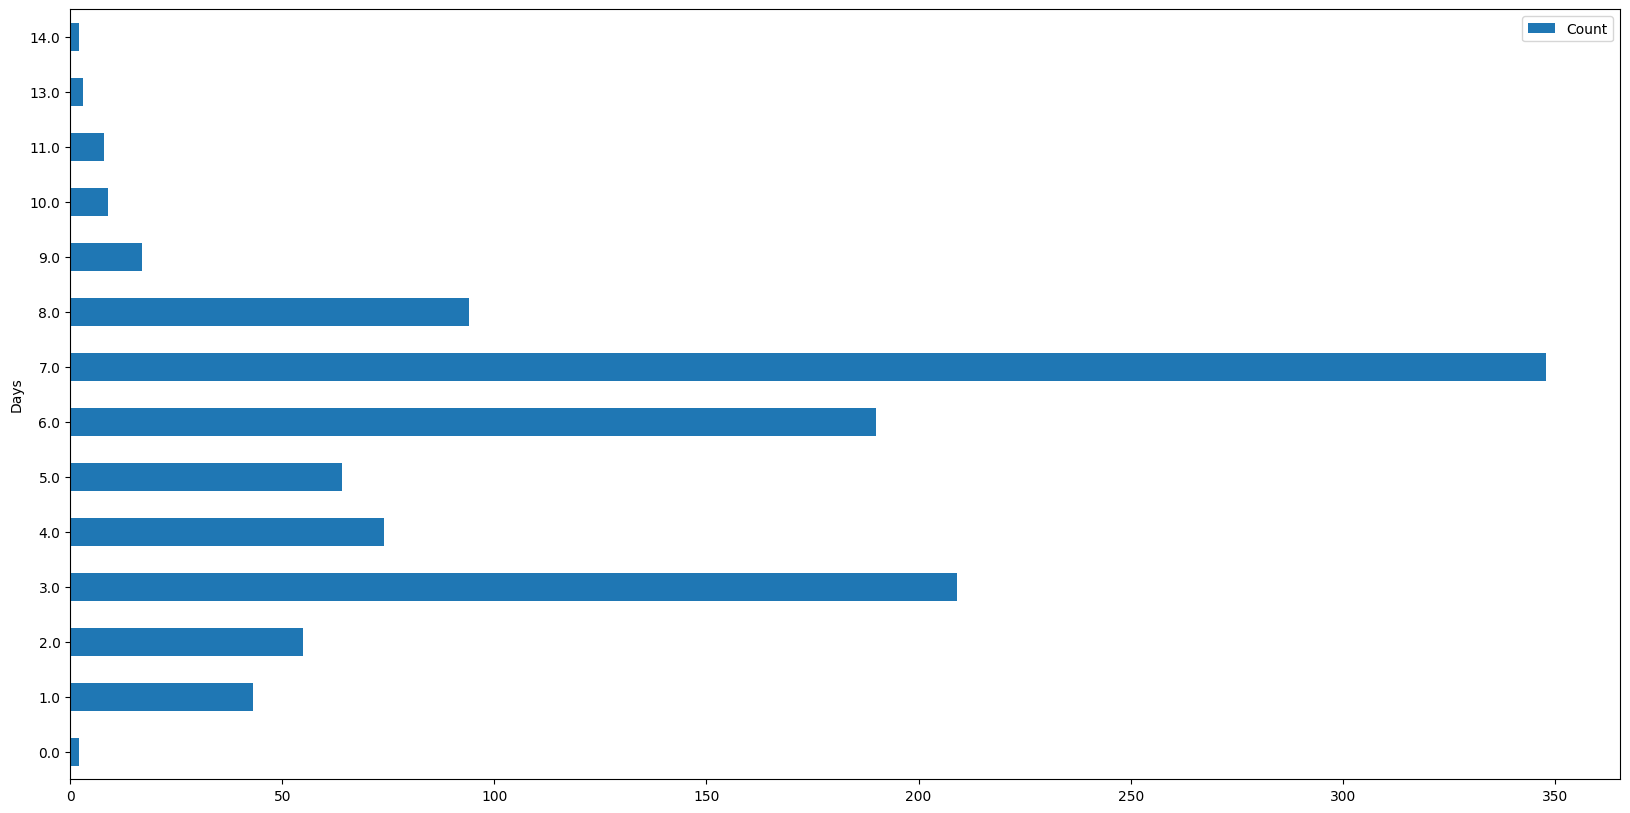

In [47]:

ax = AT_2024_VC.plot.barh(x='Days', y='Count', figsize=(20, 10))